## Data Cleaning del archivo `'ABT_CALIDAD_AIRE.xlsx'`

In [6]:
import dask.dataframe as dd
import pandas as pd

In [8]:
df = pd.read_excel('data/ABT_CALIDAD_AIRE.xlsx')

In [9]:
df.head()

,id_pto_calidad,nombre_estacion,ALTITUD,tipo_estacion_id,fecha,Calidad_NO2,Pto_trafico2,Pto_trafico1,Pto_trafico4,Pto_trafico5,...,chance_of_rain,will_it_snow,chance_of_snow,vis_km,festivo,anyo,mes,dia,hora,diasemana
0,4,Pza. de España,635,UT,01OCT17:00:00:00,77.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,0,1
1,4,Pza. de España,635,UT,01OCT17:01:00:00,34.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,1,1
2,4,Pza. de España,635,UT,01OCT17:02:00:00,26.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,2,1
3,4,Pza. de España,635,UT,01OCT17:03:00:00,18.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,3,1
4,4,Pza. de España,635,UT,01OCT17:04:00:00,12.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,4,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69621 entries, 0 to 69620
Data columns (total 86 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_pto_calidad                69621 non-null  int64  
 1   nombre_estacion               69621 non-null  object 
 2   ALTITUD                       69621 non-null  int64  
 3   tipo_estacion_id              69621 non-null  object 
 4   fecha                         69621 non-null  object 
 5   Calidad_NO2                   69307 non-null  float64
 6   Pto_trafico2                  66741 non-null  float64
 7   Pto_trafico1                  66741 non-null  float64
 8   Pto_trafico4                  69621 non-null  int64  
 9   Pto_trafico5                  69621 non-null  int64  
 10  Pto_trafico3                  69621 non-null  int64  
 11  Distancia_Pto_trafico2        66741 non-null  float64
 12  Distancia_Pto_trafico1        66741 non-null  float64
 13  D

In [17]:
columnas_nulos = []
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(f"{col} - { df[col].isnull().sum()}")
        columnas_nulos.append(col)

Calidad_NO2 - 314
Pto_trafico2 - 2880
Pto_trafico1 - 2880
Distancia_Pto_trafico2 - 2880
Distancia_Pto_trafico1 - 2880
Intensidad_Pto_trafico1 - 10187
Intensidad_Pto_trafico2 - 7176
Intensidad_Pto_trafico3 - 2342
Intensidad_Pto_trafico4 - 2985
Intensidad_Pto_trafico5 - 4949
Carga_Pto_trafico2 - 7176
Carga_Pto_trafico1 - 10187
Carga_Pto_trafico4 - 2985
Carga_Pto_trafico5 - 4949
Carga_Pto_trafico3 - 2342
Intensidad_mediaR1_500 - 6284
Intensidad_mediaR2_500_750 - 6020
Intensidad_mediaR3_750_1000 - 11099
Intensidad_mediaR4_1000_1500 - 613
Intensidad_mediaR5_1500_2000 - 354
Intensidad_mediaR6_2000 - 13
Intensidad_minR1_500 - 6284
Intensidad_minR2_500_750 - 6020
Intensidad_minR3_750_1000 - 11099
Intensidad_minR4_1000_1500 - 613
Intensidad_minR5_1500_2000 - 354
Intensidad_minR6_2000 - 13
Intensidad_maxR1_500 - 6284
Intensidad_maxR2_500_750 - 6020
Intensidad_maxR3_750_1000 - 11099
Intensidad_maxR4_1000_1500 - 613
Intensidad_maxR5_1500_2000 - 354
Intensidad_maxR6_2000 - 13
Carga_mediaR1_500 - 62

Como podemos ver, tenemos muchas columnas con valores nulos, lo cual no nos favorece

In [18]:
import seaborn as sns

<AxesSubplot:>

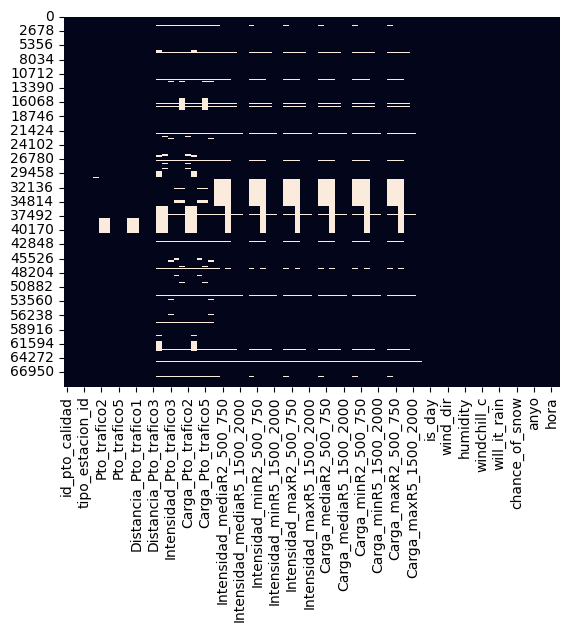

In [19]:
sns.heatmap(df.isnull(), cbar=False)